Topic 6.07  |  三角网格
# 重心坐标系
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

import os
# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

参考： 
https://mathworld.wolfram.com/BarycentricCoordinates.html

In [2]:
corners = np.array([[0, 0], [1, 0], [0.5,0.75**0.5]])
# 定义等边三角形的三个顶点
pairs = [corners[np.roll(range(3), -i)[1:]] for i in range(3)]
# numpy.roll函数可以将数组的元素沿指定的轴向滚动，
# 即将数组的最后一维或前几维的元素移动到最前面或最后面，从而实现循环移位的效果
# 每条边两个端点坐标
pairs

[array([[1.       , 0.       ],
        [0.5      , 0.8660254]]),
 array([[0.5      , 0.8660254],
        [0.       , 0.       ]]),
 array([[0., 0.],
        [1., 0.]])]

In [3]:
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])
refiner = tri.UniformTriRefiner(triangle)
trimesh_2 = refiner.refine_triangulation(subdiv=2)
points_subdiv_2 = np.column_stack([trimesh_2.x, trimesh_2.y])

### 直角坐标系坐标

In [4]:
trimesh_2.x

array([0.   , 1.   , 0.5  , 0.5  , 0.75 , 0.25 , 0.25 , 0.875, 0.375,
       0.625, 0.5  , 0.125, 0.75 , 0.625, 0.375])

In [5]:
trimesh_2.y

array([0.        , 0.        , 0.8660254 , 0.        , 0.4330127 ,
       0.4330127 , 0.        , 0.21650635, 0.64951905, 0.21650635,
       0.4330127 , 0.21650635, 0.        , 0.64951905, 0.21650635])

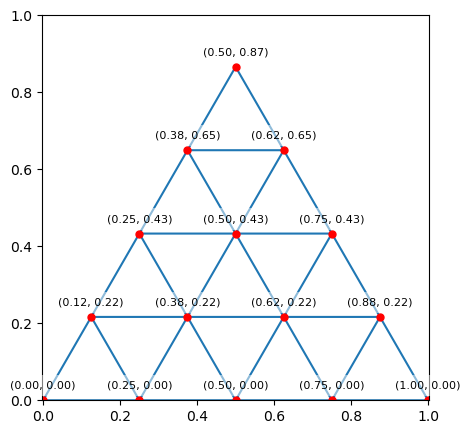

In [6]:
from scipy.spatial import Delaunay
tri_subdiv_2 = Delaunay(points_subdiv_2)

triangle_subdiv_2 = tri.Triangulation(points_subdiv_2[:, 0], points_subdiv_2[:, 1])

fig, ax = plt.subplots(figsize = (5,5))
plt.triplot(points_subdiv_2[:,0], points_subdiv_2[:,1], tri_subdiv_2.simplices)
plt.plot(points_subdiv_2[:,0], points_subdiv_2[:,1], '.r', markersize = 10)

for i, j in zip(trimesh_2.x, trimesh_2.y):
    
    text_idx = '(' + format(i, '.2f') + ', ' + format(j, '.2f') + ')'
    plt.text(i, j+0.03, text_idx,
             fontsize = 8, 
             horizontalalignment = 'center',
             bbox=dict(facecolor='w', alpha=0.5, edgecolor = 'None'))

plt.axis('equal')
# ax.axis('off')

ax.set_aspect('equal')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
fig.savefig('Figures/可视化坐标，在xy平面.svg', format='svg')

### 定义函数，坐标转换

In [7]:
AREA = 0.5 * 1 * 0.75**0.5
# 大三角形面积

tri_area = lambda xy, pair: 0.5 * np.linalg.norm(np.cross(*(pair - xy)))
# 小三角型面积

# 定义函数，将直角坐标系 (x, y) 坐标转化为 重心坐标系 (theta_1, theta_2, theta_3)
def xy2bc(xy, tol=1.e-4):
    
    BC_coords = np.array([tri_area(xy, pair_idx) for pair_idx in pairs]) / AREA
    BC_coords_ = np.clip(BC_coords, tol, 1.0 - tol)
    
    return BC_coords_

# numpy.clip(a, a_min, a_max, out=None) 
# 其中a是一个数组，后面两个参数分别表示最小和最大值，
# 将数组中的元素限制在a_min, a_max之间，
# 大于a_max的就使得它等于 a_max，
# 小于a_min,的就使得它等于a_min

In [8]:
BC_points = [xy2bc(xy) for xy in zip(trimesh_2.x, trimesh_2.y)]

# 参考：
# https://blog.bogatron.net/blog/2014/02/02/visualizing-dirichlet-distributions/

### 重心坐标系坐标

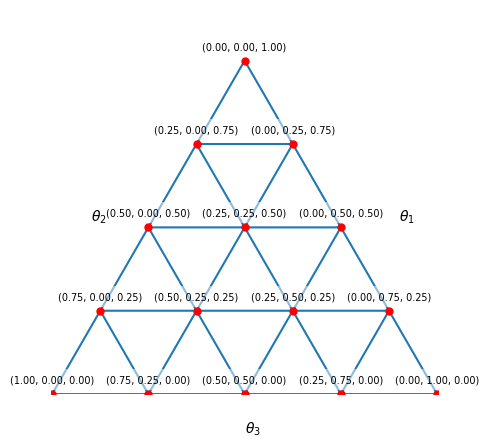

In [9]:
fig, ax = plt.subplots(figsize = (5,5))

plt.triplot(points_subdiv_2[:,0], points_subdiv_2[:,1], tri_subdiv_2.simplices)
plt.plot(points_subdiv_2[:,0], points_subdiv_2[:,1], '.r', markersize = 10)

for BC_idx,i,j in zip(BC_points,trimesh_2.x, trimesh_2.y):
    
    BC_idx_1 = BC_idx[0]
    BC_idx_2 = BC_idx[1]
    BC_idx_3 = BC_idx[2]
    
    text_idx = '(' + format(BC_idx_1, '.2f') + ', ' + format(BC_idx_2, '.2f') + ', ' + format(BC_idx_3, '.2f') + ')'
    plt.text(i, j+0.03, text_idx, 
             fontsize = 7, 
             horizontalalignment = 'center',
             bbox=dict(facecolor='w', alpha=0.5, edgecolor = 'None'))
plt.axis('equal')
plt.xlim(0, 1)
plt.text(0.9, 0.45,  r'$\theta_1$')
plt.text(0.1, 0.45, r'$\theta_2$')
plt.text(0.5, -0.1,  r'$\theta_3$')

ax.set_aspect('equal')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axis('off')

fig.savefig('Figures/三角剖分，重心坐标.svg', format='svg')

In [10]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023